In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

from sklearn.preprocessing import MinMaxScaler

import pyswarms as ps

from tensorflow import keras
from keras import layers, models
from keras import losses

In [2]:
df = pdr.get_data_yahoo('META', start=None, end=None)

model = keras.models.load_model('PSO_OASiS.keras')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data = df.filter(['Close'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

ff_data_len = int(np.ceil(len(dataset) * .8))

In [4]:
feed_forward_data = scaled_data[ff_data_len - 60: , :]

repetitions = len(scaled_data[ff_data_len:,:])

x_test = []
x_test.append(feed_forward_data[0:60,0])

x_test = np.array(x_test).reshape(1,60,1)

ff_predictions = []

for _ in range(repetitions):
    pred = model.predict(x_test)
    ff_predictions.append(scaler.inverse_transform(pred))
    x_test = x_test[:,1:,:] # remove first element
    pred = pred.reshape(1,1,1)
    x_test = np.concatenate((x_test, pred), axis=1)



1/1 [==============================] - 0s 17ms/step


C:\Users\Brandon\AppData\Local\Temp\ipykernel_11052\2930347598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = ff_predictions


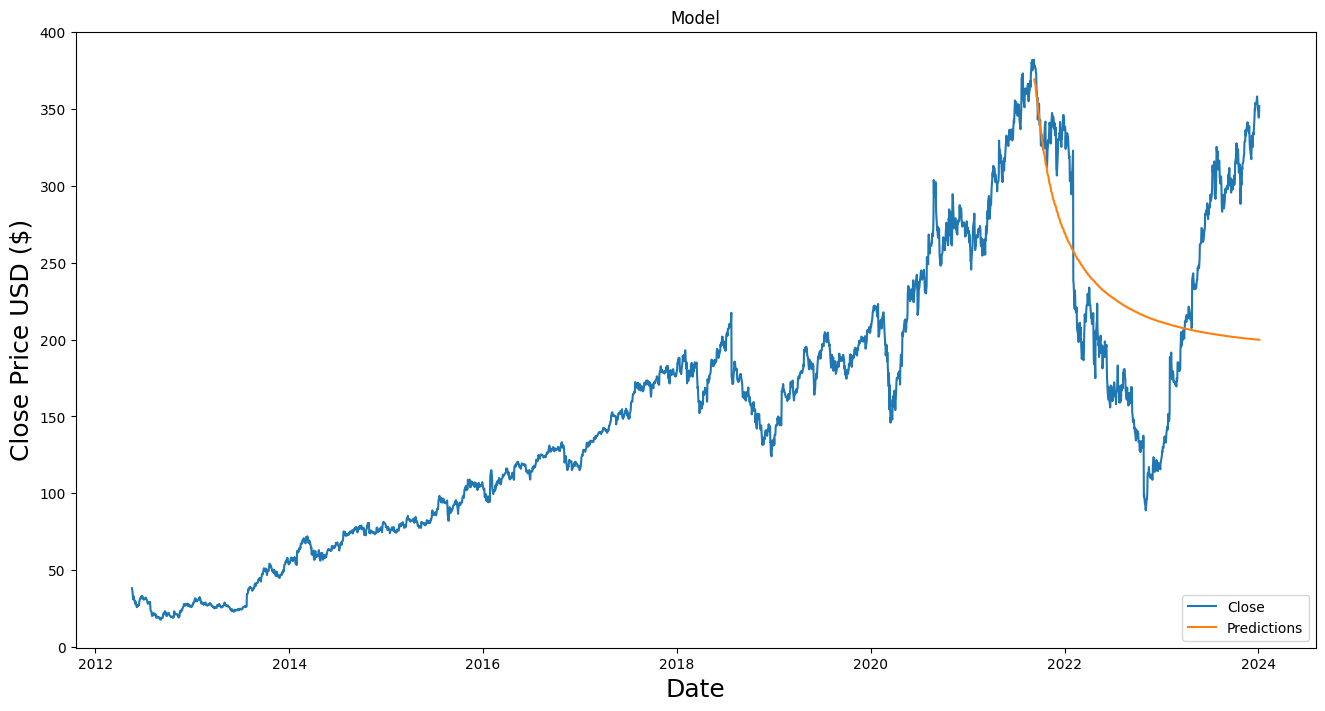

In [5]:
ff_predictions = np.array(ff_predictions).reshape(repetitions,1)
ff_predictions

valid = data[ff_data_len:]
valid['Predictions'] = ff_predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['Close'])
plt.plot(valid[['Predictions']])
plt.legend(['Close', 'Predictions'], loc='lower right')
plt.show()

In [6]:
Genesis = keras.models.load_model('Genesis/OASiS_Genesis.keras')

In [7]:
feed_forward_data = scaled_data[ff_data_len - 60: , :]

repetitions = len(scaled_data[ff_data_len:,:])

x_test = []
x_test.append(feed_forward_data[0:60,0])

x_test = np.array(x_test).reshape(1,60,1)

Genesis_predictions = []

for _ in range(repetitions):
    pred = Genesis.predict(x_test)
    Genesis_predictions.append(scaler.inverse_transform(pred))
    x_test = x_test[:,1:,:] # remove first element
    pred = pred.reshape(1,1,1)
    x_test = np.concatenate((x_test, pred), axis=1)

Genesis_predictions = np.array(Genesis_predictions).reshape(repetitions,1)
Genesis_predictions

valid['GenesisPredictions'] = Genesis_predictions

1/1 [==============================] - 0s 17ms/step


C:\Users\Brandon\AppData\Local\Temp\ipykernel_11052\2664691084.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['GenesisPredictions'] = Genesis_predictions


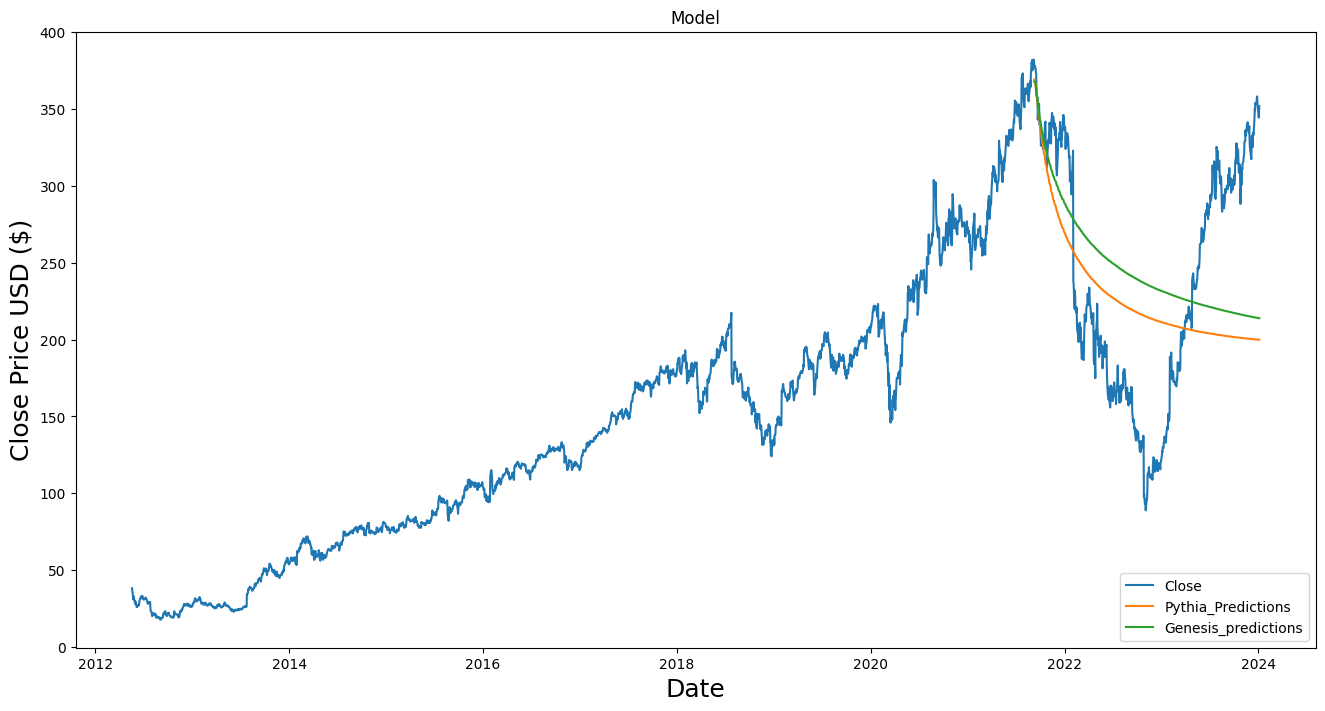

In [8]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['Close'])
plt.plot(valid[['Predictions']])
plt.plot(valid['GenesisPredictions'])
plt.legend(['Close', 'Pythia_Predictions', 'Genesis_predictions'], loc='lower right')
plt.show()

In [9]:
feed_forward_data = scaled_data[ff_data_len - 60: , :]

repetitions = len(scaled_data[ff_data_len:,:])

x_test = []
x_test.append(feed_forward_data[0:60,0])

x_test = np.array(x_test).reshape(1,60,1)

Genesis_corrected_predictions = []

for _ in range(repetitions):
    pred = Genesis.predict(x_test)
    Genesis_corrected_predictions.append(scaler.inverse_transform(pred))
    x_test = x_test[:,1:,:] # remove first element
    next_data = feed_forward_data[60+_,0].reshape(1,1,1)
    x_test = np.concatenate((x_test, next_data), axis=1)

Genesis_corrected_predictions = np.array(Genesis_corrected_predictions).reshape(repetitions,1)
Genesis_corrected_predictions

valid['GenesisCorrectedPredictions'] = Genesis_corrected_predictions

1/1 [==============================] - 0s 19ms/step


C:\Users\Brandon\AppData\Local\Temp\ipykernel_11052\3750232295.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['GenesisCorrectedPredictions'] = Genesis_corrected_predictions


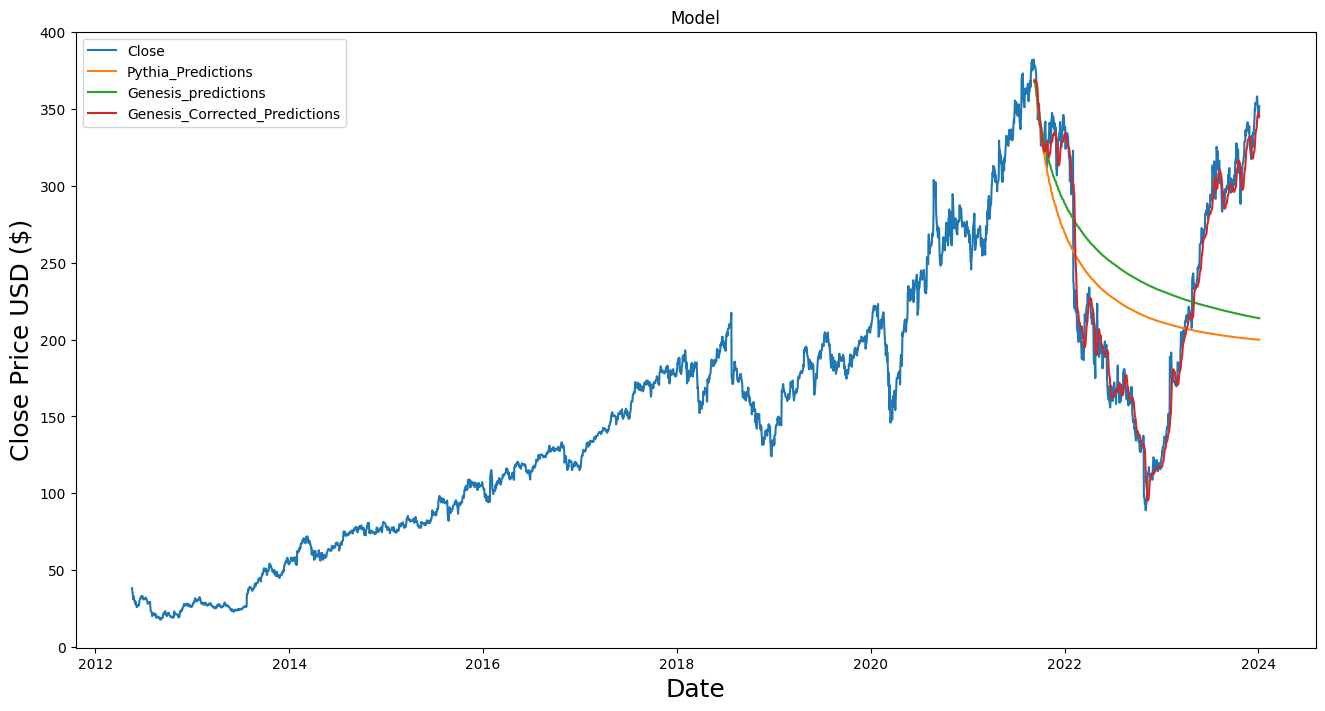

In [10]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['Close'])
plt.plot(valid[['Predictions']])
plt.plot(valid['GenesisPredictions'])
plt.plot(valid['GenesisCorrectedPredictions'])
plt.legend(['Close', 'Pythia_Predictions', 'Genesis_predictions', 'Genesis_Corrected_Predictions'], loc='upper left')
plt.show()